<a href="https://colab.research.google.com/github/zyf2021/-/blob/main/%D0%9C%D0%9C%D0%91%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Вариант 17 (Филонова)**

Конкретные количественные показатели цены и зависящие от неё величины спроса и предложения имеют вид временного ряда, представленного в таблице 1.

**СЛАУ решить методом Зейделя**


#### План действий
1.  Функция для формирования матриц А, b ✅
2.  Функция для расчета метода Зейделя ✅
3.  Функция для приведения к виду удобному для итераций ✅
4.  Функция для проверки на сходимость по l,m ✅
5.  Ускорение сходимости [ссылки](http://www.machinelearning.ru/wiki/index.php?title=Метод_простых_итераций) ✅
6.  Функция вывода графиков ✅
7.  Блок получения данных ✅

###Установка библиотек

In [18]:
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from shapely.geometry import LineString

###Исходные данные

####Q1

In [20]:
price = [float(x) for x in '1 2 3 4 5 6 7 8 9 10'.split()]
query = [float(x) for x in '2.55	4.66	5.89	4.62	3.35	7.55	4.12	6.45	5.95	4.27'.split('	')]
supply = [float(x) for x in '2.25	2.55	5.25	5.15	5.05	7.86	5.12	0.25	2.44	3.58'.split('	')]
data = list()
data.extend([price, query, supply])
data

[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 [2.55, 4.66, 5.89, 4.62, 3.35, 7.55, 4.12, 6.45, 5.95, 4.27],
 [2.25, 2.55, 5.25, 5.15, 5.05, 7.86, 5.12, 0.25, 2.44, 3.58]]

####Q + 20%

In [21]:
price_20 = [float(x) for x in '1 2 3 4 5 6 7 8 9 10'.split()]
query_20 = [float(x) for x in '2.55	4.66	5.89	4.62	3.35	7.55	4.12	6.45	5.95	4.27'.split('	')]
query_20 = [1.2*el for el in query_20]
supply_20 = [float(x) for x in '2.25	2.55	5.25	5.15	5.05	7.86	5.12	0.25	2.44	3.58'.split('	')]
data_20 = list()
data_20.extend([price_20, query_20, supply_20])
data_20

[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 [3.0599999999999996,
  5.592,
  7.068,
  5.544,
  4.02,
  9.059999999999999,
  4.944,
  7.74,
  7.14,
  5.124],
 [2.25, 2.55, 5.25, 5.15, 5.05, 7.86, 5.12, 0.25, 2.44, 3.58]]

####Q + 40%

In [22]:
price_40 = [float(x) for x in '1 2 3 4 5 6 7 8 9 10'.split()]
query_40 = [float(x) for x in '2.55	4.66	5.89	4.62	3.35	7.55	4.12	6.45	5.95	4.27'.split('	')]
query_40 = [1.4*el for el in query_20]
supply_40 = [float(x) for x in '2.25	2.55	5.25	5.15	5.05	7.86	5.12	0.25	2.44	3.58'.split('	')]
data_40 = list()
data_40.extend([price_40, query_40, supply_40])
data_40

[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 [4.283999999999999,
  7.828799999999999,
  9.895199999999999,
  7.761599999999999,
  5.627999999999999,
  12.683999999999997,
  6.9216,
  10.836,
  9.995999999999999,
  7.173599999999999],
 [2.25, 2.55, 5.25, 5.15, 5.05, 7.86, 5.12, 0.25, 2.44, 3.58]]

###Расчет графиков

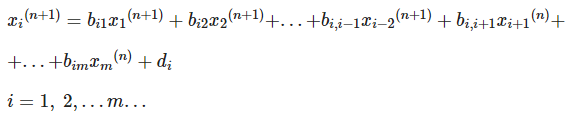

In [78]:
def A_price(price, power):
  s = sum([p**power for p in price])
  return s
def b_query(query, price, power):
  s = sum([query[i] * price[i]**power for i in range(len(query))])
  return s

def Zeidel(A, b, x, m=10, eps = 0.0001, times=1000):
  # Привести матрицу к виду удобному для итераций
  A_comfort, b_comfort = comfort_matrix(A,b)
  # Проверить сходимость матрицы
  print(convergence_matrix_m_norma(A_comfort))
  print(convergence_matrix_l_norma(A_comfort))

  k = 0
  converge = False
  while not converge:
    x_new = np.copy(x)
    for i in range(m):
      E = sum(A[i][j] * x_new[j] for j in range(i)) # E
      F = sum(A[i][j] * x[j] for j in range(i + 1, m)) # F  
      x_new[i] = (b[i] - E - F) / A[i][i]
    converge = np.max(np.abs(x_new - x)) <= eps
    x = x_new
    k += 1
    if k >= times:
      break
  print('Коэффициенты', x)
  print('Количество итераций', k)
  return x


def comfort_matrix(A,b):
  full_A = np.hstack((A, b.reshape(m,1)))
  n = len(A)

  while n != 1:
    M = 0
    M = - full_A[n-2][n-1] / full_A[n-1][n-1]
    A_triang = np.zeros(n+1)

    for i in range(n+1):
       A_triang[i] = full_A[n-2][i] + full_A[n-1][i] * M  # сложение одного уравнения с другим, умноженным на некоторую константу   
    for i in range(len(A_triang)-1):
      full_A[n-2][i] = A_triang[i]
    for i in range(len(A_triang)-1, len(full_A) + 1):
      full_A[n-2][i] = 0
    full_A[n-2][len(full_A)] = A_triang[len(A_triang) - 1]

    n -= 1

  ## матрица подходящая для метода итераций
  A_comfort = full_A[:, :m]
  b_comfort = full_A[:, m:m+1]
  return (A_comfort, b_comfort)


def convergence_matrix_m_norma(A_comfort):
  m = len(A_comfort)
  alpha = np.zeros((m,m))
  for i in range(m):
    for j in range(m):
      if j != i:
        alpha[i][j] = np.abs(-A_comfort[i][j] / A_comfort[i][i])

  sum_rows = alpha.sum(axis=1) # m-норма
  if np.max(sum_rows) < 1:
    return 'Итерационный процесс по m-норме сходится'
  return 'Итерационный процесс по m-норме НЕ сходится'


def convergence_matrix_l_norma(A_comfort):
  m = len(A_comfort)
  alpha = np.zeros((m,m))
  for i in range(m):
    for j in range(m):
      if j != i:
        alpha[i][j] = np.abs(-A_comfort[i][j] / A_comfort[i][i])

  sum_cols = alpha.sum(axis=0) # l-норма
  if np.max(sum_cols) < 1:
    return 'Итерационный процесс по l-норме сходится'
  return 'Итерационный процесс l-норме НЕ сходится'  


def create_graph(fig, axs, posx, posy, title, xlabel, ylabel, limits, legend, data):
  axs[posx, posy].set_title(title)
  axs[posx,posy].set_xlabel(xlabel)
  axs[posx,posy].set_ylabel(ylabel)
  axs[posx,posy].grid(which='major', linewidth=1.2)
  for i in range(len(data)):
    axs[posx,posy].plot(data[i][0], data[i][1], 'o-', label=legend[i])
  axs[posx,posy].legend()
  axs[posx,posy].set_ylim(limits)


def create_graph_with_intersection(fig, axs, posx, posy, title, xlabel, ylabel, limits, legend, data):
  axs[posx,posy].set_title(title)
  axs[posx,posy].set_ylabel('ylabel')
  axs[posx,posy].grid(which='major', linewidth=1.2)

  axs[posx,posy].plot(data[0], data[1], 'r', label=legend[0])
  axs[posx,posy].plot(data[0], data[2], 'g', label=legend[1])

  axs[posx,posy].legend()
  axs[posx,posy].set_ylim([0, 14])


  line1 = LineString(np.column_stack((data[0], data[1])))
  line2 = LineString(np.column_stack((data[0], data[2])))

  if line2.intersects(line1):
    intersection = line2.intersection(line1)
    list_point = [el for el in map(lambda x: x.coords[0], intersection.geoms)]
    s = 'Точки пересечения:\n'
    for i in range(len(list_point)):
      axs[posx,posy].plot(list_point[i][0], list_point[i][1], 'bo')
      s += '(' + str(round(list_point[i][0],3)) + ' ' + str(round(list_point[i][1],3)) + ')\n'
    axs[posx,posy].set_xlabel('Цена \n' + s)

In [83]:
def Zeidel_Relax(A, b, x, omega, m=10, eps = 0.0001, times=1000):

  # Привести матрицу к виду удобному для итераций
  A_comfort, b_comfort = comfort_matrix(A,b)
  # Проверить сходимость матрицы
  print(convergence_matrix_m_norma(A_comfort))
  print(convergence_matrix_l_norma(A_comfort))

  k = 0
  converge = False
  while not converge:
    x_new = np.copy(x)

    for i in range(m):
      E = sum(A[i][j] * x_new[j] for j in range(i)) # E

      F = sum(A[i][j] * x[j] for j in range(i + 1, m)) # F  

      x_new[i] = (1-omega)*x[i] + (omega/A[i][i]) * (b[i] - E - F)

    converge = np.max(np.abs(x_new - x)) <= eps

    x = x_new
    k += 1
    if k >= times:
      break
  print('Коэффициенты', x)
  print('Количество итераций', k)
  return x

In [119]:
np.set_printoptions(precision=5, suppress=True)

m = 6 # число коэффициентов

# Расчет матрицы А
A = np.zeros((m,m)) # price, то есть известный x 
for i in range(m):
  for j in range(m):
    A[i][j] = A_price(data[0], i+j)

# Расчет матрицы b для исходного спроса Q
b_Q = np.zeros(m) # Q - свободные члены
for i in range(m):
  b_Q[i] = b_query(
    data[1], data[0], i)

## сходимость 


# Расчет матрицы b для повышенного на 20% спроса Q
b_Q_20 = np.zeros(m) # Q - свободные члены
for i in range(m):
  b_Q_20[i] = b_query(data_20[1], data_20[0], i)

# Расчет матрицы b для повышенного на 40% спроса Q
b_Q_40 = np.zeros(m) # Q - свободные члены
for i in range(m):
  b_Q_40[i] = b_query(data_40[1], data_40[0], i)

# Расчет матрицы b для исходного предложения S
b_S = np.zeros(m) # Q - свободные члены
for i in range(m):
  b_S[i] = b_query(data[2], data[0], i)

x = np.zeros(m)
eps = 0.001
omega = 1.52
print('Метод Зейделя для Q')
print('-'*len('Метод Зейделя для Q'))
x_query_pred = Zeidel(A, b_Q, x, m = m, eps = eps)
print()
print('Метод Зейделя c ускорением по верхней релаксации для Q')
print('-'*len('Метод Зейделя у ускорением по верхней релаксации для Q'))
x_query_pred = Zeidel_Relax(A, b_Q, x, omega, m = m, eps = eps)

print()
print('Метод Зейделя для 1.2Q')
print('-'*len('Метод Зейделя для 1.2Q'))
x_query_pred_20 = Zeidel(A, b_Q_20, x, m = m, eps = eps)
print()
print('Метод Зейделя c ускорением по верхней релаксации для 1.2Q')
print('-'*len('Метод Зейделя у ускорением по верхней релаксации для 1.2Q'))
x_query_pred_20 = Zeidel_Relax(A, b_Q_20, x, omega, m = m, eps = eps)

print()
print('Метод Зейделя для 1.4Q')
print('-'*len('Метод Зейделя для 1.2Q'))
x_query_pred_40 = Zeidel(A, b_Q_40, x, m = m, eps = eps)
print()
print('Метод Зейделя c ускорением по верхней релаксации для 1.4Q')
print('-'*len('Метод Зейделя у ускорением по верхней релаксации для 1.4Q'))
x_query_pred_40 = Zeidel_Relax(A, b_Q_40, x, omega, m = m, eps = eps)


print()
print('Метод Зейделя для F')
print('-'*len('Метод Зейделя для F'))
x_supply_pred = Zeidel(A, b_S, x, m = m, eps = eps)
print()
print('Метод Зейделя c ускорением по верхней релаксации для F')
print('-'*len('Метод Зейделя у ускорением по верхней релаксации для F'))
x_supply_pred = Zeidel_Relax(A, b_S, x, omega, m = m, eps = eps)

# Расчет предсказаных значений спроса Q
query_pred = np.zeros(len(query))
for i in range(len(query_pred)):
  query_pred[i] = sum([x_query_pred[j]*price[i]**(j) for j in range(len(x_query_pred))])

# Расчет предсказаных значений для повышенного на 20% спроса Q
query_20_pred = np.zeros(len(query))
for i in range(len(query_pred)):
  query_20_pred[i] = sum([x_query_pred_20[j]*price[i]**(j) for j in range(len(x_query_pred_20))])

# Расчет предсказаных значений для повышенного на 40% спроса Q
query_40_pred = np.zeros(len(query))
for i in range(len(query_pred)):
  query_40_pred[i] = sum([x_query_pred_40[j]*price[i]**(j) for j in range(len(x_query_pred_40))])

# Расчет предсказаных значений предложения S
supply_pred = np.zeros(len(query))
for i in range(len(query_pred)):
  supply_pred[i] = sum([x_supply_pred[j]*price[i]**(j) for j in range(len(x_supply_pred))])


Метод Зейделя для Q
-------------------
Итерационный процесс по m-норме сходится
Итерационный процесс по l-норме сходится
Коэффициенты [ 2.93188  0.52464 -0.00048 -0.00057 -0.00012 -0.00002]
Количество итераций 68

Метод Зейделя c ускорением по верхней релаксации для Q
------------------------------------------------------
Итерационный процесс по m-норме сходится
Итерационный процесс по l-норме сходится
Коэффициенты [ 2.70027  0.69017 -0.03115  0.00154 -0.00023 -0.00001]
Количество итераций 52

Метод Зейделя для 1.2Q
----------------------
Итерационный процесс по m-норме сходится
Итерационный процесс по l-норме сходится
Коэффициенты [ 3.51633  0.63012 -0.0007  -0.00066 -0.00014 -0.00002]
Количество итераций 70

Метод Зейделя c ускорением по верхней релаксации для 1.2Q
---------------------------------------------------------
Итерационный процесс по m-норме сходится
Итерационный процесс по l-норме сходится
Коэффициенты [ 3.2395   0.82792 -0.03737  0.00187 -0.00028 -0.00001]
Количество и

### Построение графиков

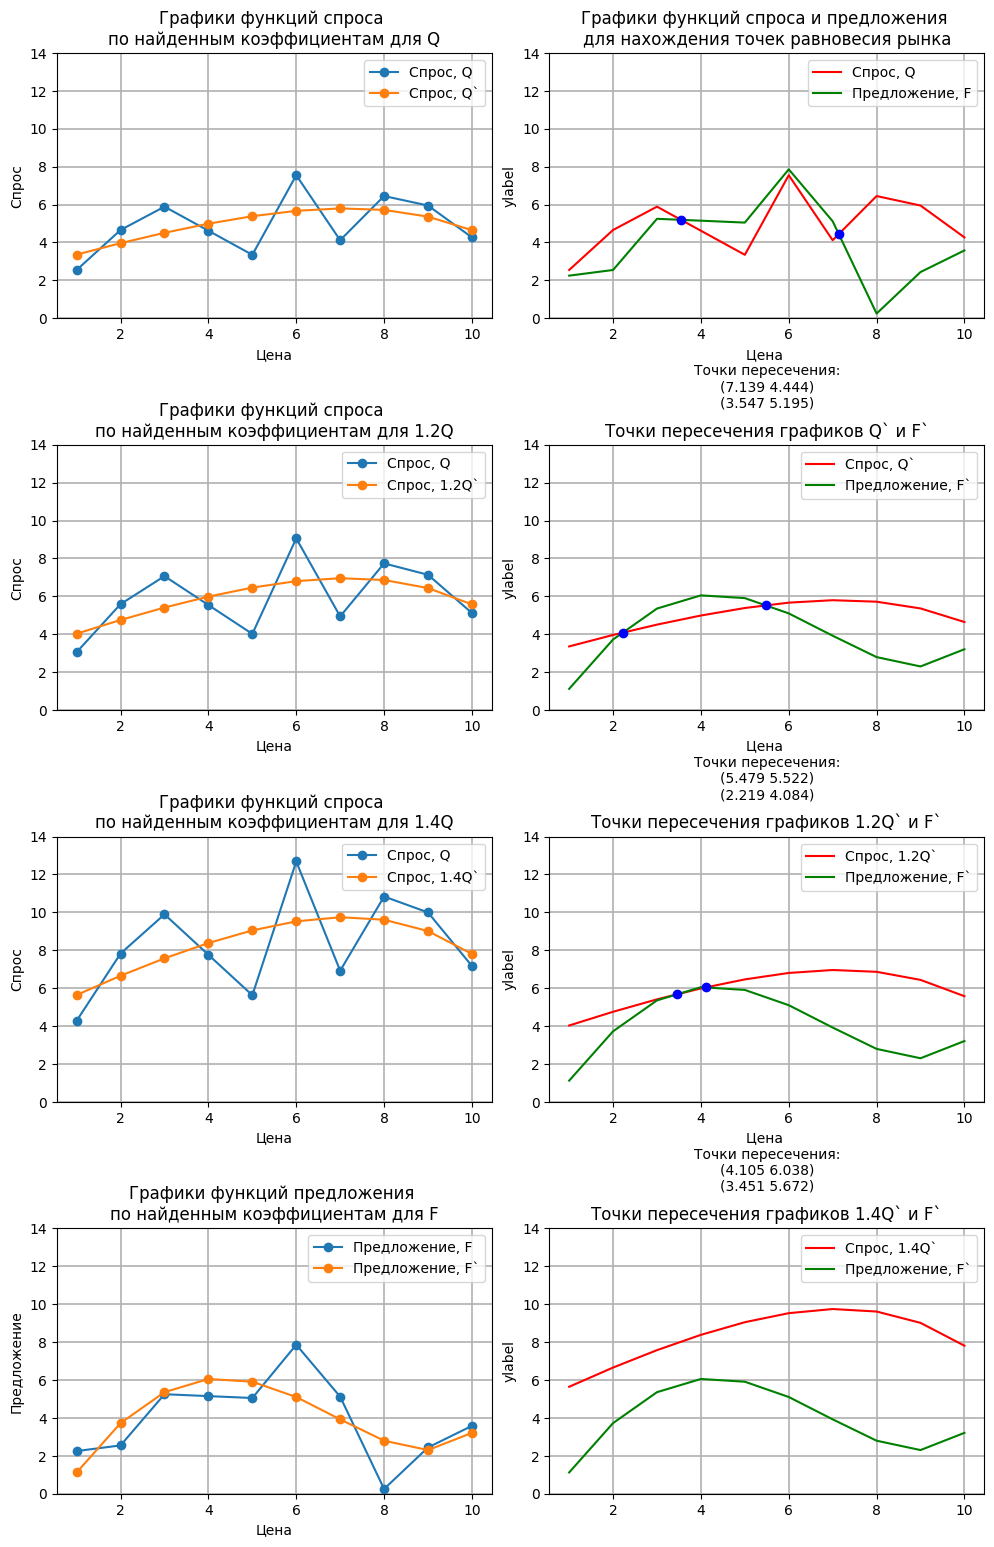

In [120]:
fig, axs = plt.subplots(4, 2, figsize=(10, 15))
fig.tight_layout(h_pad=7)

create_graph( fig, axs, 0, 0, 
              'Графики функций спроса \nпо найденным коэффициентам для Q', 
              'Цена', 
              'Спрос', 
              [0,14], ['Спрос, Q', 'Спрос, Q`'],  [[data[0], data[1]], [price, query_pred]])

create_graph(fig, axs, 1, 0, 
              'Графики функций спроса \nпо найденным коэффициентам для 1.2Q', 
              'Цена', 
              'Спрос', 
              [0,14], ['Спрос, Q', 'Спрос, 1.2Q`'], [[data[0], data_20[1]], [price, query_20_pred]])

create_graph(fig, axs, 2, 0, 
              'Графики функций спроса \nпо найденным коэффициентам для 1.4Q', 
              'Цена', 
              'Спрос', 
              [0,14], ['Спрос, Q', 'Спрос, 1.4Q`'], [[data[0], data_40[1]], [price, query_40_pred]])

create_graph(fig, axs, 3, 0, 
              'Графики функций предложения \nпо найденным коэффициентам для F', 
              'Цена', 
              'Предложение', 
              [0,14], ['Предложение, F', 'Предложение, F`'], [[data[0], data[2]], [price, supply_pred]])

create_graph_with_intersection(fig, axs, 0, 1, 
                               'Графики функций спроса и предложения \nдля нахождения точек равновесия рынка', 
                               ' ', 'Спрос. Предложение', [0, 14], ['Спрос, Q', 'Предложение, F'], 
                               [price, data[1], data[2]])

create_graph_with_intersection(fig, axs, 1, 1, 
                               'Точки пересечения графиков Q` и F`', 
                               ' ', 'Спрос. Предложение', [0, 14], ['Спрос, Q`', 'Предложение, F`'], 
                               [price, query_pred, supply_pred])

create_graph_with_intersection(fig, axs, 2, 1, 
                               'Точки пересечения графиков 1.2Q` и F`', 
                               ' ', 'Спрос. Предложение', [0, 14], ['Спрос, 1.2Q`', 'Предложение, F`'], 
                               [price, query_20_pred, supply_pred])

create_graph_with_intersection(fig, axs, 3, 1, 
                               'Точки пересечения графиков 1.4Q` и F`', 
                               ' ', 'Спрос. Предложение', [0, 14], ['Спрос, 1.4Q`', 'Предложение, F`'], 
                               [price, query_40_pred, supply_pred])

plt.show()

#### Нормальная матрица 

In [26]:
A_norm = np.dot(A.transpose(), A)
b_Q_norm = np.dot(A.transpose(), b_Q)

alpha = np.zeros((m,m))
for i in range(m):
  for j in range(m):
    if j != i:
      alpha[i][j] = np.abs(-A_norm[i][j] / A_norm[i][i]) ** 2

sum_rows = alpha.sum(axis=1)
sum_cols = sum_rows.sum() ** (1/2)
print(sum_rows)
print(sum_cols)
#print(alpha)
print(A_norm)

[44228327.93238   582782.48186     7265.07762       86.04288
        0.01176]
6694.659180757685
[[6.51063e+08 5.67198e+09 5.07969e+10 4.64103e+11 4.30461e+12]
 [5.67198e+09 4.94147e+10 4.42553e+11 4.04341e+12 3.75034e+13]
 [5.07969e+10 4.42553e+11 3.96350e+12 3.62130e+13 3.35884e+14]
 [4.64103e+11 4.04341e+12 3.62130e+13 3.30865e+14 3.06887e+15]
 [4.30461e+12 3.75034e+13 3.35884e+14 3.06887e+15 2.84647e+16]]
